# Introduccion

Contiene estructuras de datos y herramientas de manipulación de datos diseñadas **para que la limpieza y el análisis de datos sean rápidos y fáciles en Python**. 

Pandas se utiliza a menudo junto con diferentes librerias numéricas como NumPy y SciPy, bibliotecas analíticas como statsmodels y scikit-learn, y bibliotecas de visualización de datos como matplotlib. Pandas adopta partes significativas del estilo idiomático de NumPy de computación basada en matrices, especialmente funciones basadas en matrices y una preferencia por el procesamiento de datos sin bucles for.

Si bien Pandas adopta muchos modismos de codificación de NumPy, la mayor diferencia es que **Pandas está diseñado para trabajar con datos tabulares o heterogéneos. NumPy, por el contrario, es más adecuado para trabajar con datos de matrices numéricas homogéneas.**

In [1]:
import pandas as pd

# Series

Una serie es un objeto unidimensional similar a una matriz que contiene una secuencia de valores (similares a los tipos NumPy) y una matriz asociada de etiquetas de datos, llamada su índice.

In [2]:
ejemplo = pd.Series(['a','b','c','d'])
ejemplo

0    a
1    b
2    c
3    d
dtype: object

In [3]:
#Una serie que contiene edades asociadas a nombres
serieEDADES = pd.Series([13,15,20,56,30],index=['Franz','Juan','Lucia','Pedro','Luz'])
serieEDADES

Franz    13
Juan     15
Lucia    20
Pedro    56
Luz      30
dtype: int64

In [4]:
serieEDADES.index

Index(['Franz', 'Juan', 'Lucia', 'Pedro', 'Luz'], dtype='object')

In [5]:
#Cual es la principal diferencia con un array NumPy?
serieEDADES['Franz']

13

In [6]:
serieEDADES[['Franz','Luz']]

Franz    13
Luz      30
dtype: int64

In [7]:
type(serieEDADES['Luz'])

numpy.int64

In [8]:
#Si tenemos datos contenidos en un diccionario es posible crear una serie
poblacion={'La Paz':100,'Cocha':70,'Oruro':50,'Potosi':40} # ['La Paz', 'Cocha','Oruro','Potosi'] Claves
seriePOBL = pd.Series(poblacion)
seriePOBL

La Paz    100
Cocha      70
Oruro      50
Potosi     40
dtype: int64

In [9]:
#para generar una nueva serie que contenga informacion del diccionario inicial
#pero con indice diferente
cuidades = ['La Paz','Cocha','Oruro','Santa Cruz','Potosi']
seriePOBL1 = pd.Series(poblacion, index = cuidades)
seriePOBL1 #?

La Paz        100.0
Cocha          70.0
Oruro          50.0
Santa Cruz      NaN
Potosi         40.0
dtype: float64

**Nan** = Not a number

En pandas se usa NAN para marcar valores faltantes o NA. Dado que "Santa Cruz" no existe en el diccionario "poblaciones", se excluye del objeto resultante.

Las funciones **isnull y notnull en pandas** se usan para detectar datos faltantes

In [10]:
pd.isnull(seriePOBL1)

La Paz        False
Cocha         False
Oruro         False
Santa Cruz     True
Potosi        False
dtype: bool

In [11]:
pd.notnull(seriePOBL1)

La Paz         True
Cocha          True
Oruro          True
Santa Cruz    False
Potosi         True
dtype: bool

In [ ]:
dir(seriePOBL1)

In [ ]:
print(seriePOBL1.Cocha,seriePOBL1.isnull())

In [ ]:
seriePOBL

In [ ]:
seriePOBL1

In [ ]:
#Una característica útil de la serie para muchas aplicaciones es que se alinea automáticamente por etiqueta de índice en operaciones aritméticas.
#ejemplo
seriePOBL+seriePOBL1

In [ ]:
#Para anadir etiquetas
seriePOBL1.name = "Poblacion encuestada"
seriePOBL1.index.name = "Cuidad"
seriePOBL1

# Dataframe

Un DataFrame representa una tabla rectangular de datos y contiene una colección ordenada de columnas, cada una de las cuales puede ser de un tipo de valor diferente (numérico, cadena, booleano, etc.). El DataFrame tiene un índice de fila y de columna; se puede considerar como un diccionario de Series que comparten el mismo índice. 

En esencia, los datos se almacenan como uno o más bloques bidimensionales en lugar de una lista, un diccionario o alguna otra colección de matrices unidimensionales.

**Los DataFrames son una de las estructuras de datos más comunes que se utilizan en el análisis de datos moderno porque son una forma flexible e intuitiva de almacenar y trabajar con datos. Cada DataFrame contiene un modelo, conocido como esquema, que define el nombre y el tipo de datos de cada columna.**

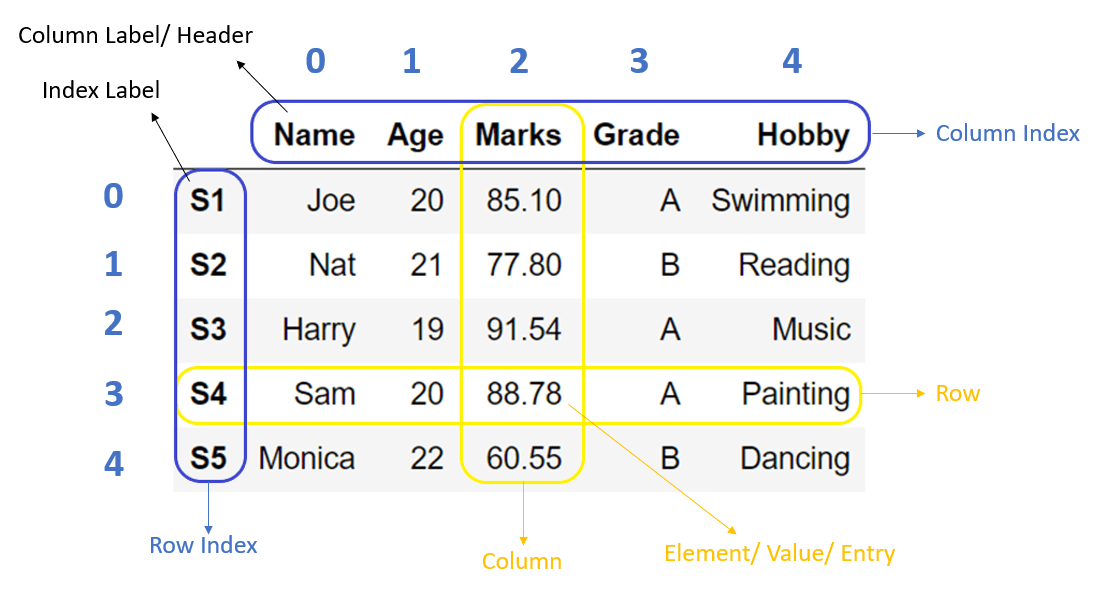

In [2]:
#ejemplo Dataframe
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [3]:
#metodos utiles
frame.head() #para mostrar la cabecera

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [4]:
frame.tail() #mostrar la cola dataframe

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [5]:
#Si deseamos que las columnas tengan un orden en particular
pd.DataFrame(data, columns=['pop','state','year'])

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [6]:
#Que pasa si adicionamos una columna que no esta contenida en data??
pd.DataFrame(data, columns=['pop','state','year','month']) #?

,pop,state,year,month
0,1.5,Ohio,2000,NaN
1,1.7,Ohio,2001,NaN
2,3.6,Ohio,2002,NaN
3,2.4,Nevada,2001,NaN
4,2.9,Nevada,2002,NaN
5,3.2,Nevada,2003,NaN


In [7]:
#los indices pueden ser diferentes de numeros. Ej.
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'month'],index=['one', 'two', 'three', 'four','five', 'six'])
frame2 #practica poco comun

,year,state,pop,month
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [8]:
#podemos acceder a las columnas mediante
print(frame2['year'],'\n \n',frame.year)

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64 
 
 0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64


In [9]:
#para acceder a las filas
print(frame2.loc['one'],'\n \n',frame.loc[1])

year     2000
state    Ohio
pop       1.5
month     NaN
Name: one, dtype: object 
 
 state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object


In [10]:
#podemos agregarle datos a las columnas desedas. month esta vacia

import numpy as np

frame2['month'] = np.arange(1,12,2)
frame2

,year,state,pop,month
one,2000,Ohio,1.5,1
two,2001,Ohio,1.7,3
three,2002,Ohio,3.6,5
four,2001,Nevada,2.4,7
five,2002,Nevada,2.9,9
six,2003,Nevada,3.2,11


In [13]:
#bastan con apuntar a la columna pasarle el conjunto de datos.
frame2['month'] = ['January','March','April','June','July','December']
#frame2['month'] = ['January','March','April','June','July','December','October'] #Que pasara? GENERA ERROR
frame2

,year,state,pop,month
one,2000,Ohio,1.5,January
two,2001,Ohio,1.7,March
three,2002,Ohio,3.6,April
four,2001,Nevada,2.4,June
five,2002,Nevada,2.9,July
six,2003,Nevada,3.2,December


In [14]:
#para borrar columna 
del frame2['year']   #no es el unico metodo
frame2

,state,pop,month
one,Ohio,1.5,January
two,Ohio,1.7,March
three,Ohio,3.6,April
four,Nevada,2.4,June
five,Nevada,2.9,July
six,Nevada,3.2,December


**IMPORTANTE** Los indices son inmutables. 

Las etiquetas de las columnas puedes ser modificadas y hasta pueden existir dos columnas con el mismo nombre

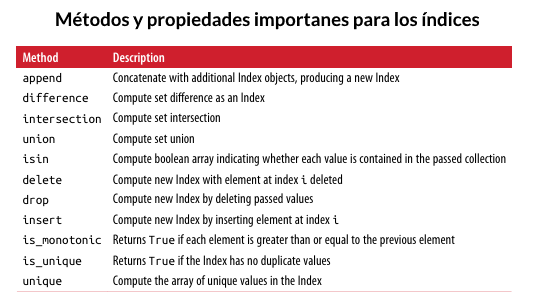

In [15]:
frame2

,state,pop,month
one,Ohio,1.5,January
two,Ohio,1.7,March
three,Ohio,3.6,April
four,Nevada,2.4,June
five,Nevada,2.9,July
six,Nevada,3.2,December


In [19]:
frame2 = frame2.drop('four')

In [20]:
frame2 #habra sido afectado???

,state,pop,month
one,Ohio,1.5,January
two,Ohio,1.7,March
three,Ohio,3.6,April
five,Nevada,2.9,July
six,Nevada,3.2,December


In [21]:
#para adicionar nueva fila
frame2.append({'state': 'FLorida'}, ignore_index=True)

C:\Users\leydi\AppData\Local\Temp\ipykernel_25072\3037091319.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame2.append({'state': 'FLorida'}, ignore_index=True)


,state,pop,month
0,Ohio,1.5,January
1,Ohio,1.7,March
2,Ohio,3.6,April
3,Nevada,2.9,July
4,Nevada,3.2,December
5,FLorida,NaN,NaN


In [22]:
frame2 # que habra pasado??

,state,pop,month
one,Ohio,1.5,January
two,Ohio,1.7,March
three,Ohio,3.6,April
five,Nevada,2.9,July
six,Nevada,3.2,December


In [23]:
frame2 = frame2.append({'state': 'FLorida'}, ignore_index=True)
frame2

C:\Users\leydi\AppData\Local\Temp\ipykernel_25072\1246996162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame2 = frame2.append({'state': 'FLorida'}, ignore_index=True)


,state,pop,month
0,Ohio,1.5,January
1,Ohio,1.7,March
2,Ohio,3.6,April
3,Nevada,2.9,July
4,Nevada,3.2,December
5,FLorida,NaN,NaN


In [24]:
#Borrando filas o columnas de un DataFrame

data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [25]:
#metodo drop permite borrar filas o columnas, hay que especificar que deseamos borrar
#Ej.
data = data.drop(["Ohio","Utah"] ) #axis = 0

In [26]:
data

,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


In [28]:
#que pasa si???
data = data.drop(["two","one"], axis = 1)

In [29]:
data

,three,four
Colorado,6,7
New York,14,15


data.drop(["two","one"]) 
Si no ponemos el eje se toma por defecto indices row - filas (axis = 0 que son filas), en las filas no tenemos **two, ni one**

In [30]:
data.drop(["two","one"], axis=1)

KeyError: "['two', 'one'] not found in axis"

In [32]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [33]:
data['Ohio':'Utah'] #Indexacion se puede realizar a traves de los indices literales

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [35]:
#Acceder a varias columnas. Cual sera la forma correcta?
#data['one','three'] #1
data[['one','three']] #2

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


**Localizacion de elementos utilizando metodo loc y iloc**

Operadores de indexacion que permiten seleccionar un subset de columnas y filas en un Dataframe.

In [36]:
#Recordamos que tenemos en data
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [37]:
data.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [38]:
data.iloc[1,[1,2]] #Cual es la diferencia?

two      5
three    6
Name: Colorado, dtype: int32

In [39]:
#pasando valores a una variable
aux = data.loc['Colorado',['two','three']]
aux

two      5
three    6
Name: Colorado, dtype: int32

In [40]:
#Que tipo sera la variable aux? una matriz?
type(aux)

pandas.core.series.Series

# Metodos de indexacion

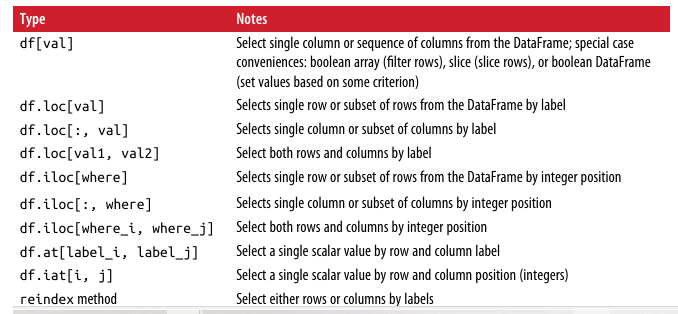

# Aritmetica y alineacion de datos

In [41]:
#Teniendo dos series:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [42]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [43]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [44]:
#Que pasara?
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

La alineación de datos interna introduce valores faltantes en las ubicaciones de las etiquetas que no se superponen. Los valores faltantes se propagarán en cálculos aritméticos posteriores.

**Que hacer para no obtener como resultado NAN?**

En operaciones aritméticas entre objetos con diferentes índices, es posible completar con un valor especial, como 0, cuando se encuentra una etiqueta de eje en un objeto pero no en el otro, para ello usamos el metodo **add**, en su argumento usamos el segundo objeto de la suma y especificamos con que valor deseamos llenar los elementos desconocidos

In [45]:
s1.add(s2, fill_value = 0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

# Metodos aritmeticos flexibles

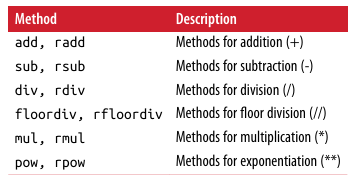

In [46]:
#operaciones entre series y dataFrames
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [47]:
pedazo_frame = frame.iloc[0] #Que selecciona??
pedazo_frame

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [48]:
#Que pasara si:
frame-pedazo_frame

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [49]:
#Las funciones de NumPy funcionan sin problema con los objetos de pandas
frame_numpy = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame_numpy

,b,d,e
Utah,1.049708,0.085064,0.928816
Ohio,1.927595,0.534308,0.588080
Texas,1.747852,-1.942415,-0.485626
Oregon,-0.795611,0.086304,-0.495752


In [52]:
frame_numpy = np.abs(frame_numpy) #hay algun error?

In [53]:
frame_numpy

,b,d,e
Utah,1.049708,0.085064,0.928816
Ohio,1.927595,0.534308,0.588080
Texas,1.747852,1.942415,0.485626
Oregon,0.795611,0.086304,0.495752


# Estadisticas descriptivas

Los objetos pandas están equipados con un conjunto de métodos matemáticos y estadísticos comunes. La mayoría de ellos pertenecen a la categoría de reducciones o estadísticas de resumen, métodos que extraen un único valor (ej. la suma o la media) de una serie o una serie de valores de las filas o columnas de un DataFrame.

In [54]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=['a', 'b', 'c', 'd'],columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [55]:
#que pasara si?
suma = df.sum()
suma

one    9.25
two   -5.80
dtype: float64

In [56]:
#que es suma? lista?
type(suma)

pandas.core.series.Series

In [57]:
#podemos realizar suma a traves de las columnas
df.sum(axis = 1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [58]:
#podemos obtener estadisticas indirectas, por ejemplo los indices donde esta el maximo y minimo valor del dataframe
df.idxmax()

one    b
two    d
dtype: object

In [59]:
#extraer resumen de estadisticas
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [60]:
#que pasa si no tenemos datos numericos???
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [61]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

# Resumen metodos descriptivos y estadisticos

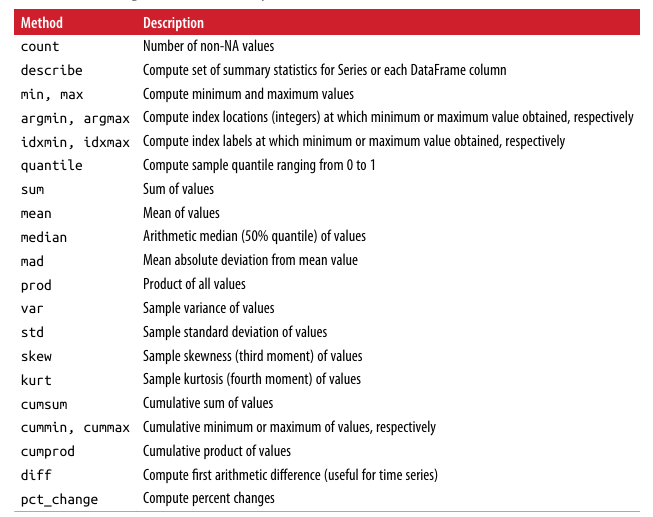